In [21]:
# limit the thread used by numpy for better parallelization 
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"  

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from Triangle.Constants import *
from Triangle.FFTTools import *
from Triangle.Noise import *
from Triangle.Orbit import *
from Triangle.GW import *
from Triangle.TDI import *

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

## Set orbit 

In [22]:
orbit = Orbit(OrbitDir='../OrbitData/MicroSateOrbitEclipticTCB') 

orbit_time = np.random.uniform(0, 100*DAY)

Ri_test = dict()
for key in SC_labels: 
    Ri_test[key] = orbit.Positionfunctions()[key](orbit_time)

nij_test = dict()
dij_test = dict() 
for key in MOSA_labels: 
    nij_test[key] = orbit.ArmVectorfunctions()[key](orbit_time)
    dij_test[key] = orbit.LTTfunctions()[key](orbit_time)

Ri_test, nij_test, dij_test 


({'1': array([-1.40269036e+11,  4.94587918e+10,  2.15158744e+08]),
  '2': array([-1.41664349e+11,  4.69976197e+10,  1.15441455e+09]),
  '3': array([-1.40119822e+11,  4.69431539e+10, -1.40955885e+09])},
 {'12': array([ 0.46810406,  0.82558572, -0.3150981 ]),
  '13': array([-0.04975803,  0.83897074,  0.54189689]),
  '23': array([-0.51591252,  0.01811465,  0.85644973]),
  '21': array([-0.46802897, -0.82564357,  0.31505805]),
  '31': array([ 0.04977055, -0.83901494, -0.5418273 ]),
  '32': array([ 0.51592525, -0.0182709 , -0.85643874])},
 {'12': array(9.94301707),
  '13': array(10.00091832),
  '23': array(9.98597639),
  '21': array(9.94419515),
  '31': array(10.00225774),
  '32': array(9.98612052)})

## Set TDI 

In [23]:
eta12_strings = {
    "12": [(1., []),],
    "23": [], 
    "31": [], 
    "21": [],
    "32": [], 
    "13": [],
}

In [24]:
X0_strings = { 
    "12": [(1., []),],
    "23": [], 
    "31": [(-1., ["13"]),], 
    "21": [(1., ["12"]),],
    "32": [], 
    "13": [(-1., []),],
}

X1_strings = { 
    "12": [(-1., []), (1., ["13", "31"])],
    "23": [], 
    "31": [(1., ["13"]), (-1., ["12", "21", "13"])], 
    "21": [(-1., ["12"]), (1., ["13", "31", "12"])],
    "32": [], 
    "13": [(1., []), (-1., ["12", "21"])],
}

X2_strings = {
    "12": [(-1., []), (1., ["13", "31"]), (1., ["13", "31", "12", "21"]), (-1., ["12", "21", "13", "31", "13", "31"])], 
    "23": [], 
    "31": [(1., ["13"]), (-1., ["12", "21", "13"]), (-1., ["12", "21", "13", "31", "13"]), (1., ["13", "31", "12", "21", "12", "21", "13"])], 
    "21": [(-1., ["12"]), (1., ["13", "31", "12"]), (1., ["13", "31", "12", "21", "12"]), (-1., ["12", "21", "13", "31", "13", "31", "12"])], 
    "32": [], 
    "13": [(1., []), (-1., ["12", "21"]), (-1., ["12", "21", "13", "31"]), (1., ["13", "31", "12", "21", "12", "21"])], 
}

In [25]:
Y1_strings = TDIStringManipulation.TDIStringCyc(X1_strings)
Z1_strings = TDIStringManipulation.TDIStringCyc(Y1_strings)

Y2_strings = TDIStringManipulation.TDIStringCyc(X2_strings)
Z2_strings = TDIStringManipulation.TDIStringCyc(Y2_strings)

In [26]:
A1_strings, E1_strings, T1_strings = TDIStringManipulation.AETStringsfromXString(X1_strings)
A1_strings, E1_strings, T1_strings

({'12': [(0.7071067811865475, []), (-0.7071067811865475, ['13', '31'])],
  '13': [(-0.7071067811865475, []),
   (0.7071067811865475, ['12', '21']),
   (-0.7071067811865475, ['31']),
   (0.7071067811865475, ['32', '23', '31'])],
  '23': [(0.7071067811865475, ['32']),
   (-0.7071067811865475, ['31', '13', '32'])],
  '21': [(0.7071067811865475, ['12']),
   (-0.7071067811865475, ['13', '31', '12'])],
  '31': [(-0.7071067811865475, ['13']),
   (0.7071067811865475, ['12', '21', '13']),
   (-0.7071067811865475, []),
   (0.7071067811865475, ['32', '23'])],
  '32': [(0.7071067811865475, []), (-0.7071067811865475, ['31', '13'])]},
 {'12': [(-0.4082482904638631, []),
   (0.4082482904638631, ['13', '31']),
   (-0.8164965809277261, ['21']),
   (0.8164965809277261, ['23', '32', '21'])],
  '13': [(0.4082482904638631, []),
   (-0.4082482904638631, ['12', '21']),
   (-0.4082482904638631, ['31']),
   (0.4082482904638631, ['32', '23', '31'])],
  '23': [(0.8164965809277261, []),
   (-0.8164965809277261, [

In [27]:
A2_strings, E2_strings, T2_strings = TDIStringManipulation.AETStringsfromXString(X2_strings)
A2_strings, E2_strings, T2_strings

({'12': [(0.7071067811865475, []),
   (-0.7071067811865475, ['13', '31']),
   (-0.7071067811865475, ['13', '31', '12', '21']),
   (0.7071067811865475, ['12', '21', '13', '31', '13', '31'])],
  '13': [(-0.7071067811865475, []),
   (0.7071067811865475, ['12', '21']),
   (0.7071067811865475, ['12', '21', '13', '31']),
   (-0.7071067811865475, ['13', '31', '12', '21', '12', '21']),
   (-0.7071067811865475, ['31']),
   (0.7071067811865475, ['32', '23', '31']),
   (0.7071067811865475, ['32', '23', '31', '13', '31']),
   (-0.7071067811865475, ['31', '13', '32', '23', '32', '23', '31'])],
  '23': [(0.7071067811865475, ['32']),
   (-0.7071067811865475, ['31', '13', '32']),
   (-0.7071067811865475, ['31', '13', '32', '23', '32']),
   (0.7071067811865475, ['32', '23', '31', '13', '31', '13', '32'])],
  '21': [(0.7071067811865475, ['12']),
   (-0.7071067811865475, ['13', '31', '12']),
   (-0.7071067811865475, ['13', '31', '12', '21', '12']),
   (0.7071067811865475, ['12', '21', '13', '31', '13', '

## Sensitivity 

### initialize 

In [28]:
L_nominal, SACC_nominal, SOMS_nominal

(3000000000.0, 3e-15, 8e-12)

In [29]:
sensitivity = TDISensitivity(Ri=Ri_test, nij=nij_test, dij=dij_test, L=L_nominal, S_OMS=SOMS_nominal, S_ACC=SACC_nominal)
plot_freqs = np.logspace(np.log10(5e-5), 0, 512)
Nsource = 1024 

### test

100%|██████████| 1024/1024 [00:00<00:00, 3656.46it/s]


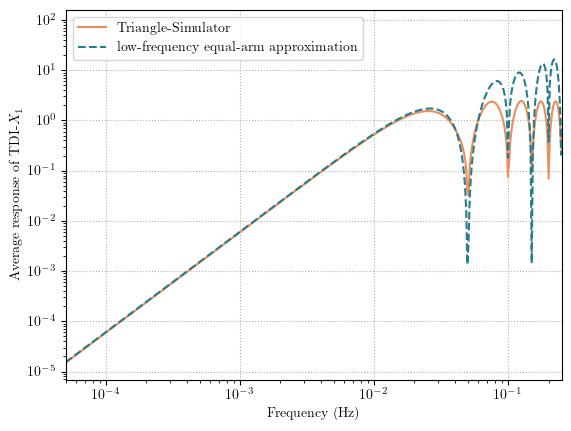

In [30]:
# test response 
Response_arr = []
for _ in tqdm(range(Nsource)):
    longitude = np.random.uniform(0, TWOPI)
    latitude = np.arcsin(np.random.uniform(-1, 1))
    Response_arr.append(sensitivity.TDI_response_function(lam=longitude, beta=latitude, f=plot_freqs, P_ij_strings=X1_strings))
Response_arr = np.array(Response_arr)  # (Nsource, Nf)
Response_avg = np.mean(Response_arr, axis=0)  # (Nf)
plt.loglog(plot_freqs, np.sqrt(Response_avg), label="Triangle-Simulator", color=ORANGE)

plot_u = TWOPI * plot_freqs * L_nominal / C 
ResFunction = 12. / 5. * plot_u ** 2 * np.sin(plot_u) ** 2 * np.cos(plot_u / 2.) ** 2
plt.loglog(plot_freqs, np.sqrt(ResFunction), color=GREEN1, linestyle="--", label="low-frequency equal-arm approximation")

plt.legend(loc="upper left")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average response of TDI-"+r'$X_1$')
plt.xlim(5e-5, 0.25)
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/TestResponse.pdf")


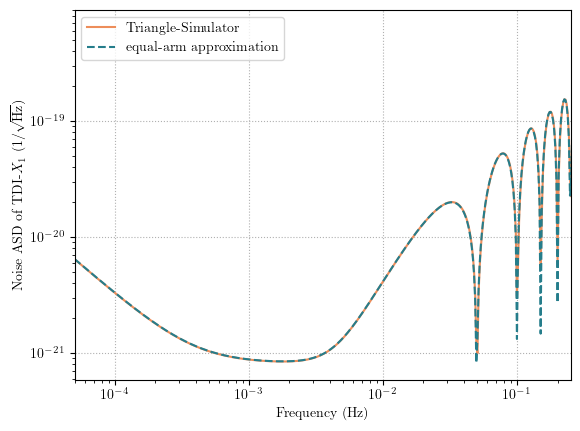

In [31]:
# test noise 
PSD = sensitivity.TDI_noise(f=plot_freqs, P_ij_strings=X1_strings)
plt.loglog(plot_freqs, np.sqrt(PSD), label="Triangle-Simulator", color=ORANGE)

PSDFunc = TDIPSDs()
plt.loglog(plot_freqs, np.sqrt(PSDFunc.PSD_X(plot_freqs)), linestyle="--", color=GREEN1, label="equal-arm approximation")

plt.xlim(5e-5, 0.25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Noise ASD of TDI-"+r'$X_1 \ (1/\sqrt{\rm Hz})$')
plt.grid(linestyle=":")
plt.legend(loc="upper left")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/TestNoise.pdf")

### 1st generation 

100%|██████████| 1024/1024 [00:00<00:00, 6661.68it/s]


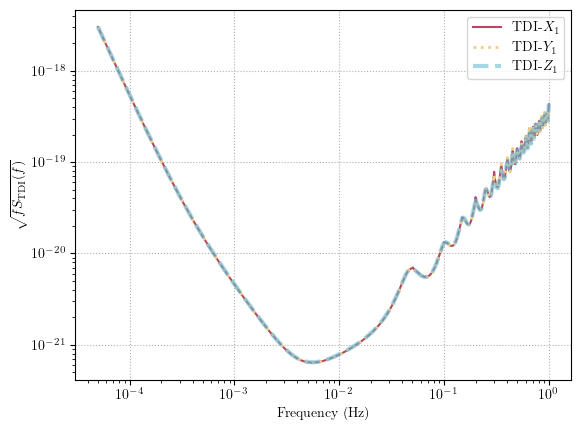

In [32]:
sens_X1 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=X1_strings, Nsource=Nsource) * plot_freqs) 
sens_Y1 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=Y1_strings, Nsource=Nsource) * plot_freqs)
sens_Z1 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=Z1_strings, Nsource=Nsource) * plot_freqs)
plt.loglog(plot_freqs, sens_X1, label="TDI-"+r"$X_1$", color=RED)
plt.loglog(plot_freqs, sens_Y1, label="TDI-"+r"$Y_1$", color=YELLOW, linestyle=":", linewidth=2)
plt.loglog(plot_freqs, sens_Z1, label="TDI-"+r"$Z_1$", color=BLUE, linestyle="--", alpha=0.6, linewidth=3)


plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityX1Y1Z1.pdf")

100%|██████████| 1024/1024 [00:00<00:00, 6784.51it/s]


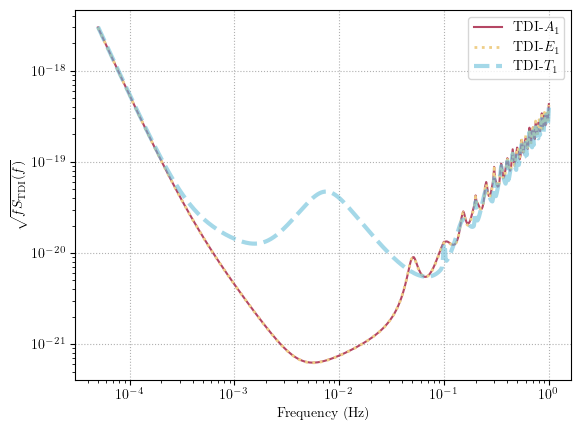

In [33]:
sens_A1 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=A1_strings, Nsource=Nsource) * plot_freqs) 
sens_E1 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=E1_strings, Nsource=Nsource) * plot_freqs)
sens_T1 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=T1_strings, Nsource=Nsource) * plot_freqs)
plt.loglog(plot_freqs, sens_A1, label="TDI-"+r"$A_1$", color=RED)
plt.loglog(plot_freqs, sens_E1, label="TDI-"+r"$E_1$", color=YELLOW, linestyle=":", linewidth=2)
plt.loglog(plot_freqs, sens_T1, label="TDI-"+r"$T_1$", color=BLUE, linestyle="--", alpha=0.6, linewidth=3)


plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityA1E1T1.pdf")

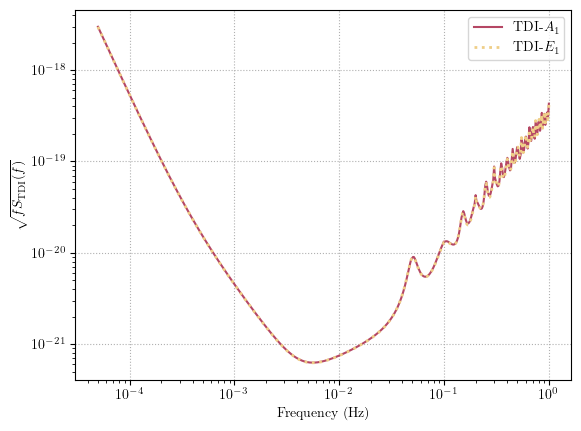

In [34]:
plt.loglog(plot_freqs, sens_A1, label="TDI-"+r"$A_1$", color=RED)
plt.loglog(plot_freqs, sens_E1, label="TDI-"+r"$E_1$", color=YELLOW, linestyle=":", linewidth=2)


plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityA1E1.pdf")

### 2nd generation 

100%|██████████| 1024/1024 [00:00<00:00, 6713.13it/s]


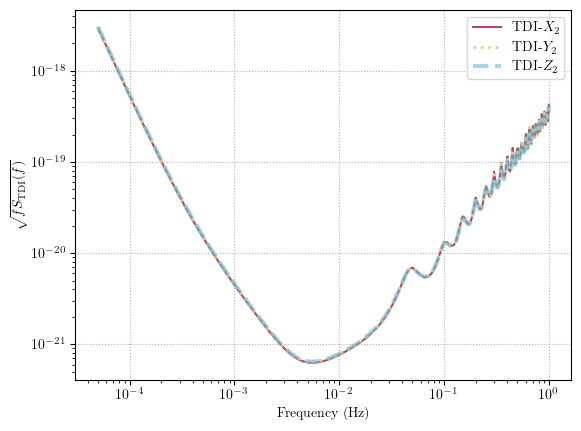

In [35]:
sens_X2 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=X2_strings, Nsource=Nsource) * plot_freqs) 
sens_Y2 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=Y2_strings, Nsource=Nsource) * plot_freqs)
sens_Z2 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=Z2_strings, Nsource=Nsource) * plot_freqs)
plt.loglog(plot_freqs, sens_X2, label="TDI-"+r"$X_2$", color=RED)
plt.loglog(plot_freqs, sens_Y2, label="TDI-"+r"$Y_2$", color=YELLOW, linestyle=":", linewidth=2)
plt.loglog(plot_freqs, sens_Z2, label="TDI-"+r"$Z_2$", color=BLUE, linestyle="--", alpha=0.6, linewidth=3)


plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityX2Y2Z2.pdf")

100%|██████████| 1024/1024 [00:00<00:00, 6816.90it/s]


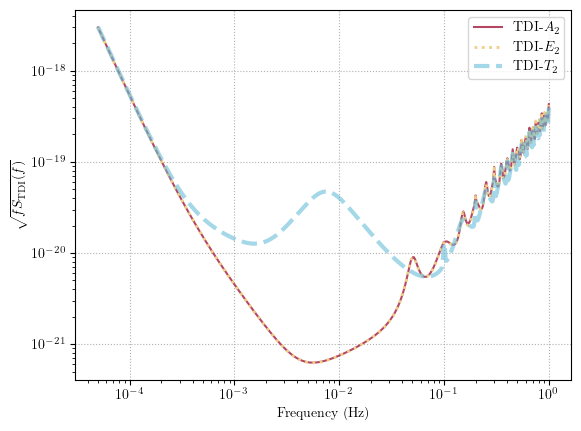

In [36]:
sens_A2 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=A2_strings, Nsource=Nsource) * plot_freqs) 
sens_E2 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=E2_strings, Nsource=Nsource) * plot_freqs)
sens_T2 = np.sqrt(sensitivity.TDI_sensitivity(f=plot_freqs, P_ij_strings=T2_strings, Nsource=Nsource) * plot_freqs)
plt.loglog(plot_freqs, sens_A1, label="TDI-"+r"$A_2$", color=RED)
plt.loglog(plot_freqs, sens_E1, label="TDI-"+r"$E_2$", color=YELLOW, linestyle=":", linewidth=2)
plt.loglog(plot_freqs, sens_T1, label="TDI-"+r"$T_2$", color=BLUE, linestyle="--", alpha=0.6, linewidth=3)


plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityA2E2T2.pdf")

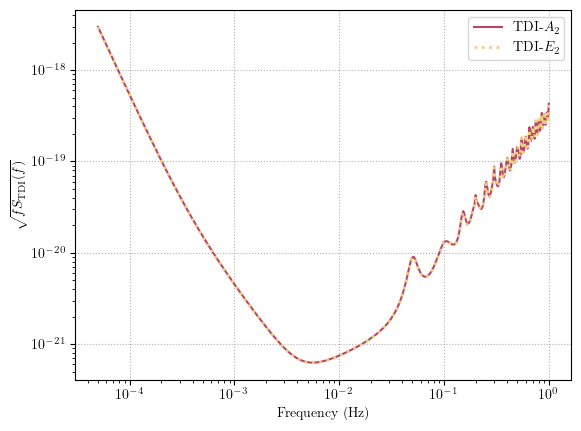

In [37]:
plt.loglog(plot_freqs, sens_A1, label="TDI-"+r"$A_2$", color=RED)
plt.loglog(plot_freqs, sens_E1, label="TDI-"+r"$E_2$", color=YELLOW, linestyle=":", linewidth=2)

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityA2E2.pdf")

### compare 

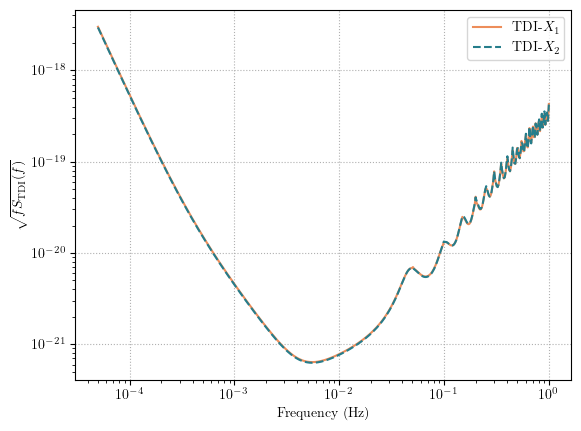

In [38]:
plt.loglog(plot_freqs, sens_X1, label="TDI-"+r"$X_1$", color=ORANGE)
plt.loglog(plot_freqs, sens_X2, label="TDI-"+r"$X_2$", color=GREEN1, linestyle="--")

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityX12.pdf")

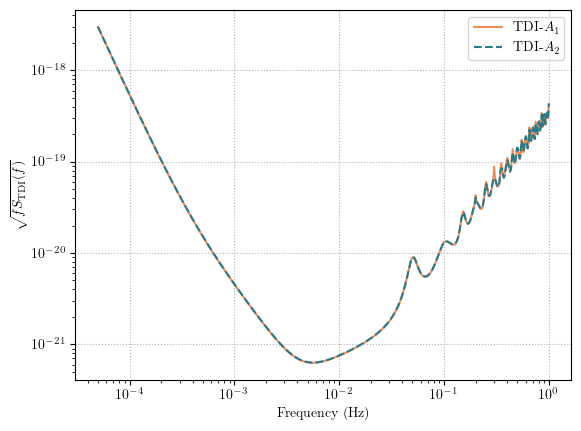

In [39]:
plt.loglog(plot_freqs, sens_A1, label="TDI-"+r"$A_1$", color=ORANGE)
plt.loglog(plot_freqs, sens_A2, label="TDI-"+r"$A_2$", color=GREEN1, linestyle="--")

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityA12.pdf")

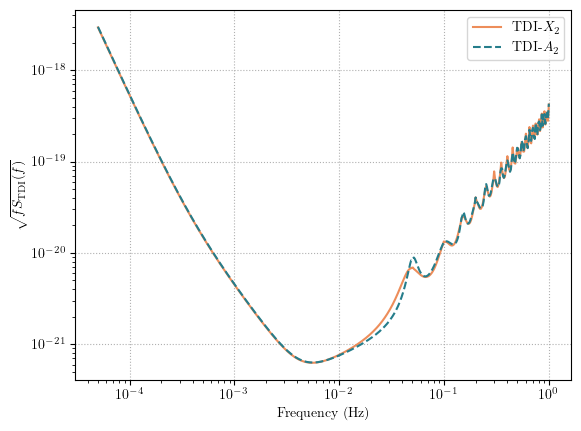

In [40]:
plt.loglog(plot_freqs, sens_X2, label="TDI-"+r"$X_2$", color=ORANGE)
plt.loglog(plot_freqs, sens_A2, label="TDI-"+r"$A_2$", color=GREEN1, linestyle="--")

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$\sqrt{f S_{\rm TDI}(f)}$")
plt.legend(loc="upper right")
plt.grid(linestyle=":")
# plt.savefig("SensitivityForTaijiWhitePaper/Figures/SensitivityX2A2.pdf")